In [1]:
import numpy as np
import pickle
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


#get the folders within same directory as this file
my_path = os.path.abspath(os.getcwd())

folders = [f for f in os.listdir(my_path) if os.path.isdir(os.path.join(my_path, f))]
print(folders)




['cifar100_1300_50000_False_l0_39_', 'cifar100_1300_50000_True_l0_33_', 'cifar100_1500_100_True_l0_38_', 'cifar100_1500_130_True_l0_99_', 'cifar100_1500_160_True_l0_29_', 'cifar100_1500_190_True_l0_29_', 'cifar100_1500_220_True_l0_83_', 'cifar100_1500_250_True_l0_50_', 'cifar100_1500_50000_False_l0_27_', 'cifar100_1500_50000_True_l0_130_', 'cifar10_1000_50000_True_l0_159_', 'cifar10_100_50000_False_l0_202_', 'cifar10_100_50000_True_l0_63_', 'cifar10_1100_50000_False_l0_167_', 'cifar10_1100_50000_True_l0_28_', 'cifar10_1300_50000_False_l0_27_', 'cifar10_1300_50000_True_l0_28_', 'cifar10_1500_1000_True_l0_69_', 'cifar10_1500_1150_True_l0_86_', 'cifar10_1500_1300_True_l0_21_', 'cifar10_1500_1450_True_l0_134_', 'cifar10_1500_1600_True_l0_84_', 'cifar10_1500_1750_True_l0_86_', 'cifar10_1500_1900_True_l0_162_', 'cifar10_1500_2050_True_l0_76_', 'cifar10_1500_2200_True_l0_36_', 'cifar10_1500_2350_True_l0_43_', 'cifar10_1500_2500_True_l0_168_', 'cifar10_1500_50000_False_l0_50_', 'cifar10_1500_5

In [2]:
def assign_exps(folders):
    experiments = {"Supervised":[], "Fewshot":[], "Transfer":[]}
    
    #if it is supervised, then n_count is 50000
    
    #if it is fewshot, then n_count is less than 50000
    
    #if it is transfer, then n_count is 50000, with two datasets
    
    #datasets: cifar10, cifar100, mnist, fashion_mnist
    #need special processing for fashion_mnist name (because it has an underscore)
    
    #trial folder's name: (dataset)_(training_count)_(n_count)_(freeze)_(layer)_(layer.filters)
    #fashion_mnist : (fashion)_(mnist)_...
    
    
    #n_count = 50000, then it is supervised
    #n_count < 50000, then it is fewshot
    
    for folder in folders:
        folder_name_list = folder.split("_")
        if folder_name_list[0] == "fashion":
            folder_name_list[0] = "fashion_mnist"
            #delete the second element
            del folder_name_list[1]
        if folder_name_list[0] == "Transfer":
            experiments["Transfer"].append(folder)
            continue
        if folder_name_list[2] == "50000":
            experiments["Supervised"].append(folder)
        elif int(folder_name_list[2]) < 50000:
            experiments["Fewshot"].append(folder)


    
    return experiments
        
    
    
exps = assign_exps(folders)
print(exps)

{'Supervised': ['cifar100_1300_50000_False_l0_39_', 'cifar100_1300_50000_True_l0_33_', 'cifar100_1500_50000_False_l0_27_', 'cifar100_1500_50000_True_l0_130_', 'cifar10_1000_50000_True_l0_159_', 'cifar10_100_50000_False_l0_202_', 'cifar10_100_50000_True_l0_63_', 'cifar10_1100_50000_False_l0_167_', 'cifar10_1100_50000_True_l0_28_', 'cifar10_1300_50000_False_l0_27_', 'cifar10_1300_50000_True_l0_28_', 'cifar10_1500_50000_False_l0_50_', 'cifar10_1500_50000_True_l0_103_', 'cifar10_1500_50000_True_l0_42_', 'cifar10_1600_50000_False_l0_43_', 'cifar10_1600_50000_True_l0_50_', 'cifar10_2100_50000_False_l0_56_', 'cifar10_2100_50000_True_l0_80_', 'cifar10_2200_50000_True_l0_163_', 'cifar10_2600_50000_False_l0_105_', 'cifar10_2600_50000_True_l0_40_', 'cifar10_2900_50000_True_l0_41_', 'cifar10_600_50000_False_l0_167_', 'cifar10_600_50000_True_l0_88_', 'cifar10_800_50000_True_l0_90_', 'fashion_mnist_1300_50000_False_l0_22_', 'fashion_mnist_1300_50000_True_l0_20_', 'fashion_mnist_1500_50000_False_l0_2

Transfer_cifar10_cifar100_1500_50000_True_l0_136_
target_history_integration does not exist
Transfer_cifar10_cifar100_1500_50000_True_l0_149_
src_integration:  0.7121999859809875
src_ord:  0.6431999802589417
target_integration:  0.38989999890327454
target_ord:  0.3831999897956848


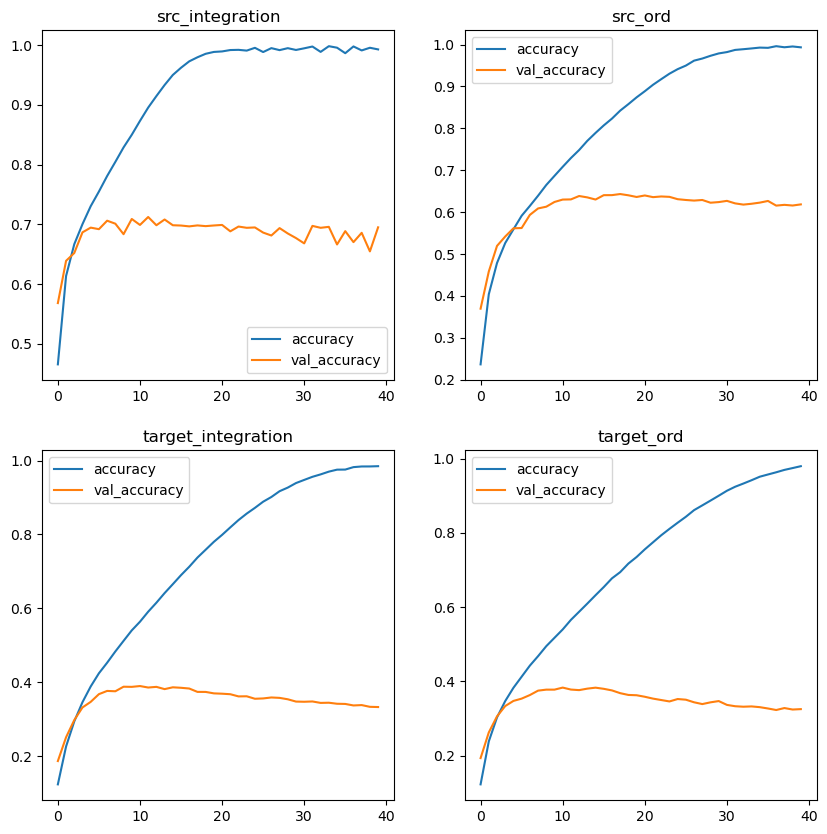

Transfer_cifar10_cifar100_1500_50000_True_l0_50_
target_history_integration does not exist


In [3]:
transfer_exp = exps["Transfer"]

cifar10 = []
for exp in transfer_exp:
    if "cifar10" in exp:
        cifar10.append(exp)

for exp in cifar10:
    print(exp)
    #read histories
    src_history_integration = pickle.load(open(exp + "/src_history_integration", "rb"))
    src_history_ord = pickle.load(open(exp + "/src_history_ord", "rb"))
    #check target exists
    if os.path.exists(exp + "/target_history_integration") == False:
        print("target_history_integration does not exist")
        continue
    target_history_integration = pickle.load(open(exp + "/target_history_integration", "rb"))
    target_history_ord = pickle.load(open(exp + "/target_history_ord", "rb"))
    
    #print the highest val_accuarcy
    print("src_integration: ", max(src_history_integration["val_accuracy"]))
    print("src_ord: ", max(src_history_ord["val_accuracy"]))
    print("target_integration: ", max(target_history_integration["val_accuracy"])) 
    print("target_ord: ", max(target_history_ord["val_accuracy"]))
    
    #plot the 4 histories
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.plot(src_history_integration["accuracy"])
    plt.plot(src_history_integration["val_accuracy"])
    plt.title("src_integration")
    plt.legend(["accuracy", "val_accuracy"])
    
    plt.subplot(2, 2, 2)
    plt.plot(src_history_ord["accuracy"])
    plt.plot(src_history_ord["val_accuracy"]) 
    plt.title("src_ord")
    plt.legend(["accuracy", "val_accuracy"])

    plt.subplot(2, 2, 3)
    plt.plot(target_history_integration["accuracy"])
    plt.plot(target_history_integration["val_accuracy"])
    plt.title("target_integration")
    plt.legend(["accuracy", "val_accuracy"])
     
    plt.subplot(2, 2, 4)
    plt.plot(target_history_ord["accuracy"])
    plt.plot(target_history_ord["val_accuracy"])
    plt.title("target_ord")
    plt.legend(["accuracy", "val_accuracy"])
    
    
    plt.show()


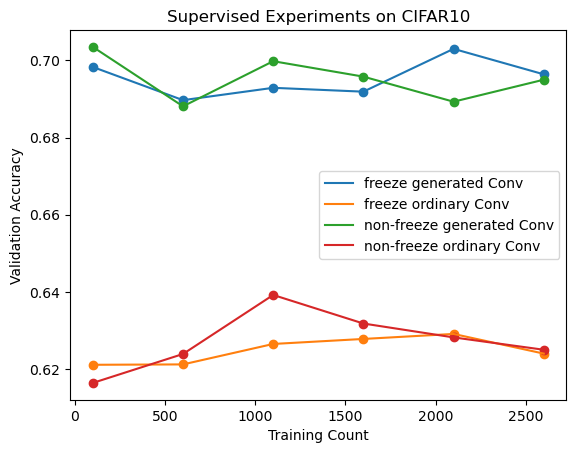

generated non-freeze, generated freeze, ordinary non-freeze, ordinary freeze
cifar10 results:  [0.695900022983551, 0.6968500018119812, 0.6376000046730042]
cifar100 results:  [0.373199999332428, 0.38909998536109924, 0.32989999651908875]
mnist results:  [0.9940999746322632, 0.9936000108718872, 0.9914000034332275]
fashion results:  [0.9100000262260437, 0.9121000170707703, 0.8978000283241272]


C:\Users\Yunjie Zhu\AppData\Local\Temp\ipykernel_13880\4160698926.py:188: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1, 4, 1)


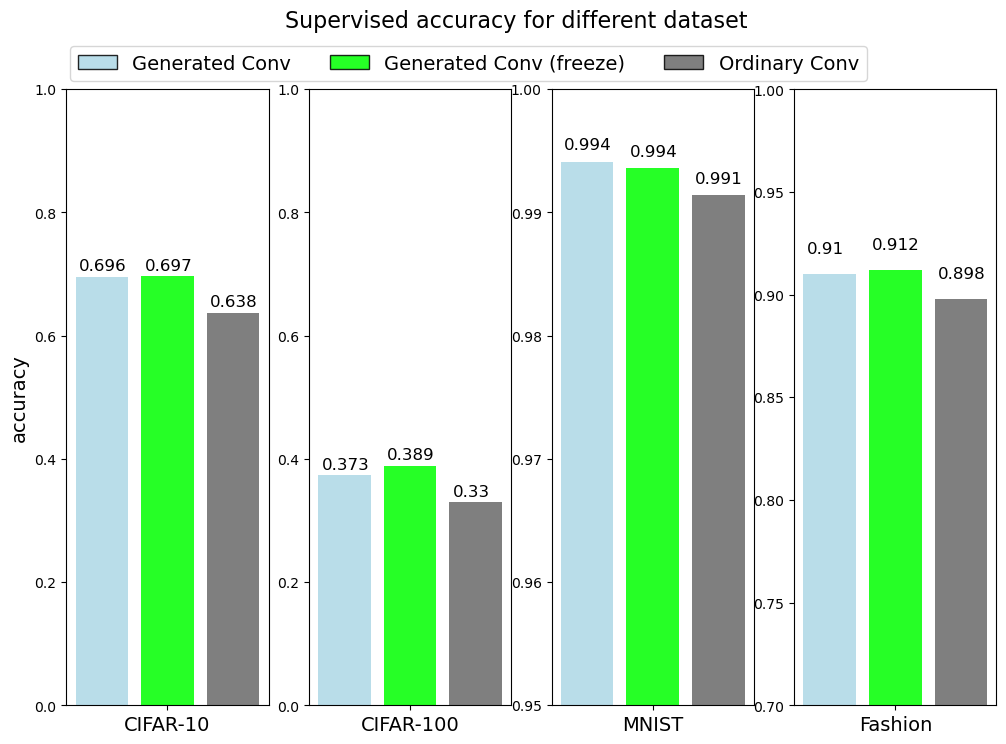

In [4]:
#supervised experiments on cifar10 results
#x axis: training count
#y axis: accuracy in validation set

def read_history_bin(history_path):
    with open(history_path, 'rb') as f:
        history = pickle.load(f)
    return history

integration_history_name = "history_integration"
ord_history_name = "history_ord"


def plot_supervised_acc_exp1(experiments):
    supervised_exps = experiments["Supervised"]
    #only get the cifar10 experiments
    cifar10_exps = [exp for exp in supervised_exps if exp.split("_")[0] == "cifar10"]
    
    #100 to 2600, step 500
    training_counts = [100, 600, 1100, 1600, 2100, 2600]
    #filtering out the experiments that are not in the training_counts list
    cifar10_exps = [exp for exp in cifar10_exps if int(exp.split("_")[1]) in training_counts]
    
    freeze_set_exps = [exp for exp in cifar10_exps if exp.split("_")[3] == "True"]
    non_freeze_set_exps = [exp for exp in cifar10_exps if exp.split("_")[3] == "False"]
    
    lines_to_plot = {}
    
    for exp in freeze_set_exps:
        exp_name = "freeze"
        history_path = os.path.join(exp, integration_history_name)
        history = read_history_bin(history_path)
        #get the highest validation accuracy
        val_acc_integ = max(history["val_accuracy"])
        
        #read the ord history
        history_path = os.path.join(exp, ord_history_name)
        history = read_history_bin(history_path)
        #get the highest validation accuracy
        val_acc_ord = max(history["val_accuracy"])
        if exp_name + " generated Conv" not in lines_to_plot:
            lines_to_plot[exp_name + " generated Conv"] = []
        lines_to_plot[exp_name + " generated Conv"].append(val_acc_integ)
        
        if exp_name + " ordinary Conv" not in lines_to_plot:
            lines_to_plot[exp_name + " ordinary Conv"] = []
            
        lines_to_plot[exp_name + " ordinary Conv"].append(val_acc_ord)
        
    for exp in non_freeze_set_exps:
        exp_name = "non-freeze"
        history_path = os.path.join(exp, integration_history_name)
        history = read_history_bin(history_path)
        #get the highest validation accuracy
        val_acc_integ = max(history["val_accuracy"])
        
        #read the ord history
        history_path = os.path.join(exp, ord_history_name)
        history = read_history_bin(history_path)
        #get the highest validation accuracy
        val_acc_ord = max(history["val_accuracy"])
        if exp_name + " generated Conv" not in lines_to_plot:
            lines_to_plot[exp_name + " generated Conv"] = []
        lines_to_plot[exp_name + " generated Conv"].append(val_acc_integ)
        
        if exp_name + " ordinary Conv" not in lines_to_plot:
            lines_to_plot[exp_name + " ordinary Conv"] = []
            
        lines_to_plot[exp_name + " ordinary Conv"].append(val_acc_ord)
        
    #plot the lines
    for line_name in lines_to_plot:
        plt.plot(training_counts, lines_to_plot[line_name], label=line_name)
        #add circle markers
        plt.scatter(training_counts, lines_to_plot[line_name])
    
    plt.xlabel("Training Count")
    plt.ylabel("Validation Accuracy")
    plt.title("Supervised Experiments on CIFAR10")
    plt.legend()
    plt.show()
    
    
def read_both_history(history_path):
    integ_hist = read_history_bin(os.path.join(history_path, integration_history_name))
    ord_hist = read_history_bin(os.path.join(history_path, ord_history_name))
    return integ_hist, ord_hist

def plot_supervised_acc_exp2(experiments):
    #plot the experiments that have 1500 training count and 50000 n_count
    supervised_exps = experiments["Supervised"]
    #for all the 4 datasets
    datasets = ["cifar10", "cifar100", "mnist", "fashion"] #fashion to substitute fashion_mnist because of the underscore
    #filter out experiments not having 1500 training count
    exp_1500 = []
    for exp in supervised_exps:
        if exp.split("_")[1] == "1500":
            exp_1500.append(exp)
        if exp.split("_")[0] == "fashion" and exp.split("_")[2] == "1500":
            exp_1500.append(exp)
    
    cifar10_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "cifar10" and exp.split("_")[3] == "True"]
    
    #read the history
    cifar10_freeze_integ_history = []
    cifar10_freeze_ord_history = []
    for exp in cifar10_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        cifar10_freeze_integ_history.append(integ_hist)
        cifar10_freeze_ord_history.append(ord_hist)
    
    
    cifar10_non_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "cifar10" and exp.split("_")[3] == "False"]
    
    #read the history
    cifar10_non_freeze_integ_history = []
    cifar10_non_freeze_ord_history = []
    for exp in cifar10_non_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        cifar10_non_freeze_integ_history.append(integ_hist)
        cifar10_non_freeze_ord_history.append(ord_hist)
    
    cifar100_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "cifar100" and exp.split("_")[3] == "True"]
    
    #read the history
    cifar100_freeze_integ_history = []
    cifar100_freeze_ord_history = []
    for exp in cifar100_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        cifar100_freeze_integ_history.append(integ_hist)
        cifar100_freeze_ord_history.append(ord_hist)
    
    cifar100_non_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "cifar100" and exp.split("_")[3] == "False"]
    #read the history
    cifar100_non_freeze_integ_history = []
    cifar100_non_freeze_ord_history = []
    for exp in cifar100_non_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        cifar100_non_freeze_integ_history.append(integ_hist)
        cifar100_non_freeze_ord_history.append(ord_hist)
        
        
    mnist_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "mnist" and exp.split("_")[3] == "True"]
    #read the history
    mnist_freeze_integ_history = []
    mnist_freeze_ord_history = []
    for exp in mnist_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        mnist_freeze_integ_history.append(integ_hist)
        mnist_freeze_ord_history.append(ord_hist)
        
    mnist_non_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "mnist" and exp.split("_")[3] == "False"]
    #read the history
    mnist_non_freeze_integ_history = []
    mnist_non_freeze_ord_history = []
    for exp in mnist_non_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        mnist_non_freeze_integ_history.append(integ_hist)
        mnist_non_freeze_ord_history.append(ord_hist)
    
    fashion_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "fashion" and exp.split("_")[4] == "True"]
    #read the history
    fashion_freeze_integ_history = []
    fashion_freeze_ord_history = []
    for exp in fashion_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        fashion_freeze_integ_history.append(integ_hist)
        fashion_freeze_ord_history.append(ord_hist)
        
    fashion_non_freeze_exps = [exp for exp in exp_1500 if exp.split("_")[0] == "fashion" and exp.split("_")[4] == "False"]
    #read the history
    fashion_non_freeze_integ_history = []
    fashion_non_freeze_ord_history = []
    for exp in fashion_non_freeze_exps:
        integ_hist, ord_hist = read_both_history(exp)
        fashion_non_freeze_integ_history.append(integ_hist)
        fashion_non_freeze_ord_history.append(ord_hist)
    
    
    #plot two bars for each dataset, using different colors for freeze and non-freeze
    #and for each dataset, there are both generated and ordinary conv, so there are 4 bars for each dataset
    
    #put cifar10 and cifar100 together, mnist and fashion together
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    #4 subplots in horizontal
    ax1 = plt.subplot(1, 4, 1)
    ax2 = plt.subplot(1, 4, 2)
    ax3 = plt.subplot(1, 4, 3) 
    ax4 = plt.subplot(1, 4, 4)
    
    color1 = "lightblue"
    color2 = "lime"
    color3 = "dimgray"
    
    color_for_generated = color1
    color_for_generated_freeze = color2
    color_for_ordinary = color3
    
    #mean acc for cifar10
    cifar10_results = []
    #take mean of all experiments' max acc
    cifar10_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in cifar10_non_freeze_integ_history]))
    cifar10_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in cifar10_freeze_integ_history]))
    cifar10_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in cifar10_non_freeze_ord_history]))
    cifar10_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in cifar10_freeze_ord_history]))
    
    #mean acc for cifar100
    cifar100_results = []
    #take mean of all experiments' max acc
    cifar100_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in cifar100_non_freeze_integ_history]))
    cifar100_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in cifar100_freeze_integ_history]))
    cifar100_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in cifar100_non_freeze_ord_history]))
    cifar100_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in cifar100_freeze_ord_history]))
    
    #mean acc for mnist
    mnist_results = []
    mnist_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in mnist_non_freeze_integ_history]))
    mnist_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in mnist_freeze_integ_history]))
    mnist_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in mnist_non_freeze_ord_history]))
    mnist_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in mnist_freeze_ord_history]))
    
    #mean acc for fashion
    fashion_results = []
    fashion_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in fashion_non_freeze_integ_history]))
    fashion_results.append(np.mean([np.max(integ_hist["val_accuracy"]) for integ_hist in fashion_freeze_integ_history]))
    fashion_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in fashion_non_freeze_ord_history]))
    fashion_results.append(np.mean([np.max(ord_hist["val_accuracy"]) for ord_hist in fashion_freeze_ord_history]))
    
    #take the highest acc for the last two elements in each list, they are the results for ordinary conv
    cifar10_results[2] = max(cifar10_results[2], cifar10_results[3])
    del cifar10_results[3]
    cifar100_results[2] = max(cifar100_results[2], cifar100_results[3])
    del cifar100_results[3]
    mnist_results[2] = max(mnist_results[2], mnist_results[3])
    del mnist_results[3]
    fashion_results[2] = max(fashion_results[2], fashion_results[3])
    del fashion_results[3]
    
    #print them all
    print("generated non-freeze, generated freeze, ordinary non-freeze, ordinary freeze")
    print("cifar10 results: ", cifar10_results)
    print("cifar100 results: ", cifar100_results)
    print("mnist results: ", mnist_results)
    print("fashion results: ", fashion_results)
    
    #plotting for cifar10 and cifar100
    ax1.bar([0, 1, 2], cifar10_results, color=[color_for_generated, color_for_generated_freeze, color_for_ordinary], alpha = 0.85)
    
    ax2.bar([0, 1, 2], cifar100_results, color=[color_for_generated, color_for_generated_freeze, color_for_ordinary], alpha = 0.85)
    
    ax3.bar([0, 1, 2], mnist_results, color=[color_for_generated, color_for_generated_freeze, color_for_ordinary], alpha = 0.85)
    
    ax4.bar([0, 1, 2], fashion_results, color=[color_for_generated, color_for_generated_freeze, color_for_ordinary], alpha = 0.85)
    #put results above the bars
    for i in range(3):
        ax1.text(i-0.35, cifar10_results[i]+0.01, str(round(cifar10_results[i], 3)), fontsize=12)
        ax2.text(i-0.35, cifar100_results[i]+0.01, str(round(cifar100_results[i], 3) ), fontsize=12)
        ax3.text(i-0.35, mnist_results[i]+0.001, str(round(mnist_results[i], 3) ), fontsize=12)
        ax4.text(i-0.35, fashion_results[i]+0.01, str(round(fashion_results[i], 3) ), fontsize=12)
        
        
    
    #only set ticks for datasets' names
    ax1.set_xticks([ 1])
    ax1.set_xticklabels(["CIFAR-10"], fontsize=14)
    ax2.set_xticks([ 1])
    ax2.set_xticklabels(["CIFAR-100"], fontsize=14)
    ax3.set_xticks([ 1])
    ax3.set_xticklabels(["MNIST"], fontsize=14)
    ax4.set_xticks([ 1])
    ax4.set_xticklabels(["Fashion"], fontsize=14)
    
    #add a legend
    #and say it applies to all subplots
    from matplotlib.patches import Patch
    
    legend_elements = [Patch(facecolor=color_for_generated, edgecolor='black', label='Generated Conv',  alpha = 0.85),
                          Patch(facecolor=color_for_generated_freeze, edgecolor='black', label='Generated Conv (freeze)', alpha = 0.85),
                            Patch(facecolor=color_for_ordinary, edgecolor='black', label='Ordinary Conv',  alpha = 0.85)]
    
    
    #add a title above the whole figure
    fig.suptitle("Supervised accuracy for different dataset", fontsize=16)
    
    #put legend below the figure title
    loc_val = [0.8, 0.946]
    fig.legend(handles=legend_elements, ncol=3, bbox_to_anchor=loc_val, fontsize=14)
    
    #set y axis range
    ax1.set_ylim([0, 1])
    ax2.set_ylim([0, 1])
    ax3.set_ylim([0.95, 1])
    ax4.set_ylim([0.7, 1])
    
    
    #remove numbers on x axis
    
    #set y axis label
    ax1.set_ylabel("accuracy", fontsize=14)
    
    
    
    
    
    plt.show()
    
    
    
    
    
    

plot_supervised_acc_exp1(exps)
plot_supervised_acc_exp2(exps)


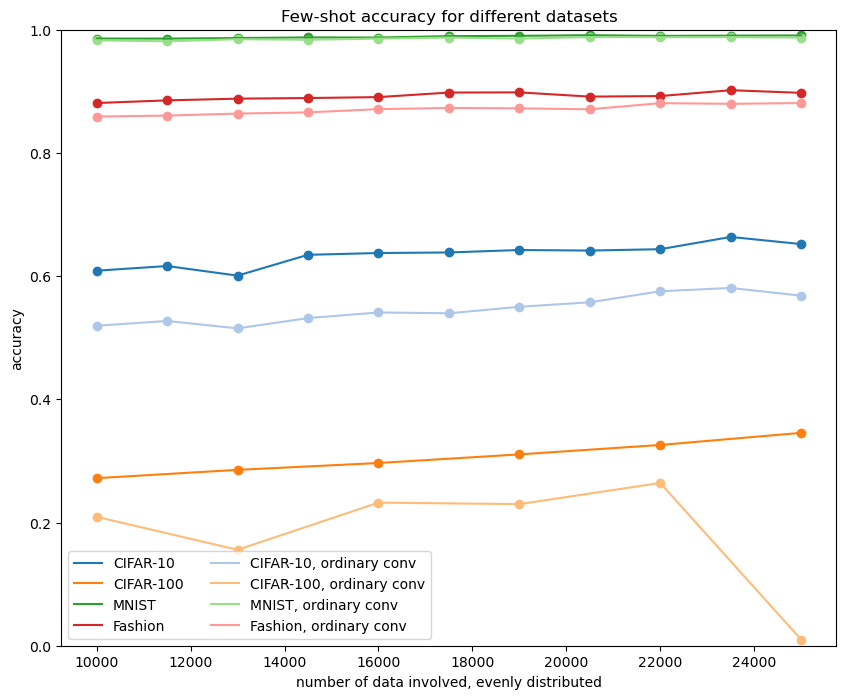

In [5]:
def plot_fewshot_exps(history_fewshot):
    cifar10_exps = []
    cifar100_exps = []
    mnist_exps = []
    fashion_exps = []
    
    for exp in history_fewshot:
        if "cifar10_" in exp and exp.split("_")[1] == "1500":
            cifar10_exps.append(exp)
        elif "cifar100_" in exp and exp.split("_")[1] == "1500":
            cifar100_exps.append(exp)
        elif "mnist_" in exp and exp.split("_")[1] == "1500":
            mnist_exps.append(exp)
        elif "fashion_mnist_" in exp and exp.split("_")[2] == "1500":
            fashion_exps.append(exp)
            
    data_cifar10 = [] #x, y
    data_cifar10_ord = [] #x, y
    for exp in cifar10_exps:
        x = int(exp.split("_")[2]) * 10 #number of data involved
        integ_hist, ord_hist = read_both_history(exp)
        y = np.max(integ_hist["val_accuracy"])
        y_ord = np.max(ord_hist["val_accuracy"])
        data_cifar10.append([x, y])
        data_cifar10_ord.append([x, y_ord])
        
        
    data_cifar100 = [] #x, y
    data_cifar100_ord = [] #x, y
    
    for exp in cifar100_exps:
        x = int(exp.split("_")[2]) * 100
        integ_hist, ord_hist = read_both_history(exp)
        y = np.max(integ_hist["val_accuracy"])
        y_ord = np.max(ord_hist["val_accuracy"])
        data_cifar100.append([x, y])
        data_cifar100_ord.append([x, y_ord])
        
    data_mnist = [] #x, y
    data_mnist_ord = [] #x, y
    for exp in mnist_exps:
        x = int(exp.split("_")[2]) * 10
        integ_hist, ord_hist = read_both_history(exp)
        y = np.max(integ_hist["val_accuracy"])
        y_ord = np.max(ord_hist["val_accuracy"])
        data_mnist.append([x, y])
        data_mnist_ord.append([x, y_ord])
        
    data_fashion = [] #x, y
    data_fashion_ord = [] #x, y
    for exp in fashion_exps:    
        x = int(exp.split("_")[3]) * 10
        integ_hist, ord_hist = read_both_history(exp)
        y = np.max(integ_hist["val_accuracy"])
        y_ord = np.max(ord_hist["val_accuracy"])
        data_fashion.append([x, y])
        data_fashion_ord.append([x, y_ord])
        
    #sort the data based on x, and then plot
    data_cifar10 = sorted(data_cifar10, key=lambda x: x[0])
    data_cifar100 = sorted(data_cifar100, key=lambda x: x[0])
    data_mnist = sorted(data_mnist, key=lambda x: x[0])
    data_fashion = sorted(data_fashion, key=lambda x: x[0])
    
    #plotting
    #using different colors for different datasets
    #darker color for ordinary conv
    color_for_cifar10 = "#1f77b4"
    color_for_cifar10_ord = "#aec7e8"
    
    color_for_cifar100 = "#ff7f0e"
    color_for_cifar100_ord = "#ffbb78"
    
    color_for_mnist = "#2ca02c"
    color_for_mnist_ord = "#98df8a"
    
    color_for_fashion = "#d62728"
    color_for_fashion_ord = "#ff9896"
    
    
    plt.figure(figsize=(10, 8))
    plt.plot([x[0] for x in data_cifar10], [x[1] for x in data_cifar10], color=color_for_cifar10, label="CIFAR-10")
    plt.plot([x[0] for x in data_cifar100], [x[1] for x in data_cifar100], color=color_for_cifar100, label="CIFAR-100")
    plt.plot([x[0] for x in data_mnist], [x[1] for x in data_mnist], color=color_for_mnist, label="MNIST")
    plt.plot([x[0] for x in data_fashion], [x[1] for x in data_fashion], color=color_for_fashion, label="Fashion")
    
    #plot the ordinary conv
    plt.plot([x[0] for x in data_cifar10_ord], [x[1] for x in data_cifar10_ord], color=color_for_cifar10_ord, label="CIFAR-10, ordinary conv")
    plt.plot([x[0] for x in data_cifar100_ord], [x[1] for x in data_cifar100_ord], color=color_for_cifar100_ord, label="CIFAR-100, ordinary conv")
    plt.plot([x[0] for x in data_mnist_ord], [x[1] for x in data_mnist_ord], color=color_for_mnist_ord, label="MNIST, ordinary conv")
    plt.plot([x[0] for x in data_fashion_ord], [x[1] for x in data_fashion_ord], color=color_for_fashion_ord, label="Fashion, ordinary conv")
    
    #add points markers
    plt.scatter([x[0] for x in data_cifar10], [x[1] for x in data_cifar10], color=color_for_cifar10)
    plt.scatter([x[0] for x in data_cifar100], [x[1] for x in data_cifar100], color=color_for_cifar100)
    plt.scatter([x[0] for x in data_mnist], [x[1] for x in data_mnist], color=color_for_mnist)
    plt.scatter([x[0] for x in data_fashion], [x[1] for x in data_fashion], color=color_for_fashion)
     
    #for ordinary conv
    plt.scatter([x[0] for x in data_cifar10_ord], [x[1] for x in data_cifar10_ord], color=color_for_cifar10_ord)
    plt.scatter([x[0] for x in data_cifar100_ord], [x[1] for x in data_cifar100_ord], color=color_for_cifar100_ord)
    plt.scatter([x[0] for x in data_mnist_ord], [x[1] for x in data_mnist_ord], color=color_for_mnist_ord)
    plt.scatter([x[0] for x in data_fashion_ord], [x[1] for x in data_fashion_ord], color=color_for_fashion_ord)
    
    #add a legend
    plt.legend(ncol=2)
    
    #add a title
    plt.title("Few-shot accuracy for different datasets")
    
    #set x axis label
    plt.xlabel("number of data involved, evenly distributed")
    
    #set y axis label
    plt.ylabel("accuracy")
    
    #set y axis range
    plt.ylim([0, 1])
    
    plt.show()
    
    
plot_fewshot_exps(exps["Fewshot"])

In [6]:
#get the files under results folder
files = os.listdir(my_path)
#select the onels with l1 in its name
files = [x for x in files if "l1" in x]

print(files)


['cifar10_1500_50000_True_l0_34_l1_220_history_integration', 'cifar10_1500_50000_True_l0_34_l1_220_history_ord', 'fashion_mnist_1500_50000_True_l0_22_l1_311_history_integration', 'fashion_mnist_1500_50000_True_l0_22_l1_311_history_ord', 'mnist_1500_50000_True_l0_22_l1_311_history_integration', 'mnist_1500_50000_True_l0_22_l1_311_history_ord']


In [7]:
#get the history files
cifar10_integration = [x for x in files if "cifar10" in x and "integration" in x]
cifar10_ord = [x for x in files if "cifar10" in x and "ord" in x]

fashion_integration = [x for x in files if "fashion" in x and "integration" in x]
fashion_ord = [x for x in files if "fashion" in x and "ord" in x]

mnist_integration = [x for x in files if "mnist" in x and "integration" in x and "fashion" not in x]
mnist_ord = [x for x in files if "mnist" in x and "ord" in x and "fashion" not in x]

print(cifar10_integration)
print(cifar10_ord)
print(fashion_integration)
print(fashion_ord)
print(mnist_integration)
print(mnist_ord)


#plot them on same graph
#x axis: epochs
#y axis: val accuracy

data_cifar10_integration = read_history_bin(os.path.join(my_path, cifar10_integration[0]))
data_cifar10_ord = read_history_bin(os.path.join(my_path, cifar10_ord[0]))



data_fashion_integration = read_history_bin(os.path.join(my_path, fashion_integration[0]))
data_fashion_ord = read_history_bin(os.path.join(my_path, fashion_ord[0]))

data_mnist_integration = read_history_bin(os.path.join(my_path, mnist_integration[0]))
data_mnist_ord = read_history_bin(os.path.join(my_path, mnist_ord[0]))



['cifar10_1500_50000_True_l0_34_l1_220_history_integration']
['cifar10_1500_50000_True_l0_34_l1_220_history_ord']
['fashion_mnist_1500_50000_True_l0_22_l1_311_history_integration']
['fashion_mnist_1500_50000_True_l0_22_l1_311_history_ord']
['mnist_1500_50000_True_l0_22_l1_311_history_integration']
['mnist_1500_50000_True_l0_22_l1_311_history_ord']


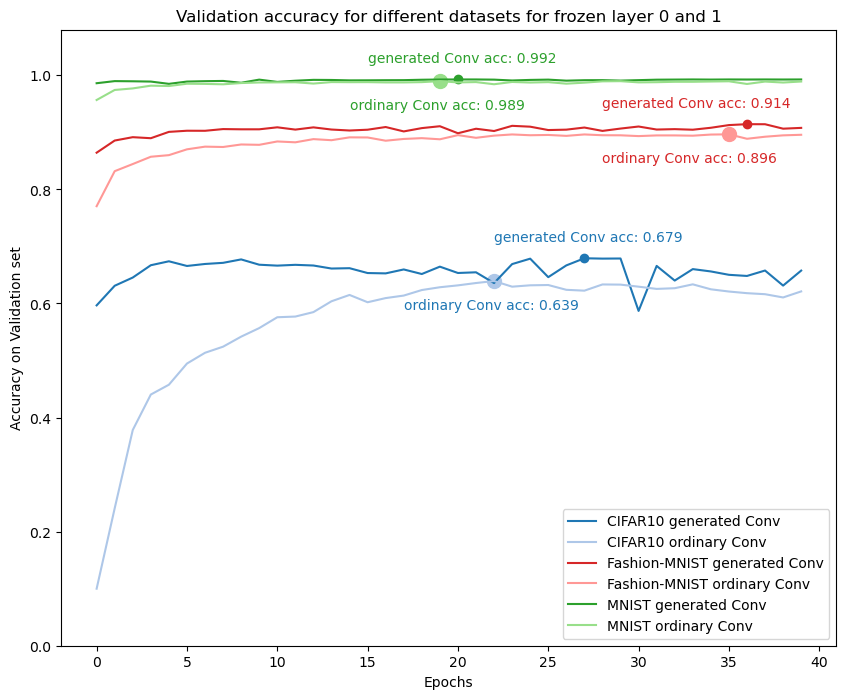

In [8]:
color_for_cifar10 = "#1f77b4"
color_for_cifar10_ord = "#aec7e8"


color_for_mnist = "#2ca02c"
color_for_mnist_ord = "#98df8a"

color_for_fashion = "#d62728"
color_for_fashion_ord = "#ff9896"

fig = plt.figure(figsize=(10, 8))
 
#plot the 6 lines
val_acc_cifar10_integration = data_cifar10_integration["val_accuracy"]
val_acc_cifar10_ord = data_cifar10_ord["val_accuracy"]

val_acc_fashion_integration = data_fashion_integration["val_accuracy"]
val_acc_fashion_ord = data_fashion_ord["val_accuracy"]

val_acc_mnist_integration = data_mnist_integration["val_accuracy"]
val_acc_mnist_ord = data_mnist_ord["val_accuracy"]

plt.plot(val_acc_cifar10_integration, color=color_for_cifar10)
plt.plot(val_acc_cifar10_ord, color=color_for_cifar10_ord)

plt.plot(val_acc_fashion_integration, color=color_for_fashion)
plt.plot(val_acc_fashion_ord, color=color_for_fashion_ord)

plt.plot(val_acc_mnist_integration, color=color_for_mnist)
plt.plot(val_acc_mnist_ord, color=color_for_mnist_ord)

#scatter the max acc points for each line
max_acc_cifar10_integration = max(val_acc_cifar10_integration)
max_acc_idx_cifar10_integration = val_acc_cifar10_integration.index(max_acc_cifar10_integration)

max_acc_cifar10_ord = max(val_acc_cifar10_ord)
max_acc_idx_cifar10_ord = val_acc_cifar10_ord.index(max_acc_cifar10_ord)

max_acc_fashion_integration = max(val_acc_fashion_integration)
max_acc_idx_fashion_integration = val_acc_fashion_integration.index(max_acc_fashion_integration)

max_acc_fashion_ord = max(val_acc_fashion_ord)
max_acc_idx_fashion_ord = val_acc_fashion_ord.index(max_acc_fashion_ord)

max_acc_mnist_integration = max(val_acc_mnist_integration)
max_acc_idx_mnist_integration = val_acc_mnist_integration.index(max_acc_mnist_integration)

max_acc_mnist_ord = max(val_acc_mnist_ord)
max_acc_idx_mnist_ord = val_acc_mnist_ord.index(max_acc_mnist_ord)

plt.scatter(max_acc_idx_cifar10_integration, max_acc_cifar10_integration, color=color_for_cifar10)
plt.scatter(max_acc_idx_cifar10_ord, max_acc_cifar10_ord, color=color_for_cifar10_ord, s=100)

plt.text(max_acc_idx_cifar10_ord - 5, max_acc_cifar10_ord - 0.05, "ordinary Conv"+" acc: "+str(max_acc_cifar10_ord)[0:5]
         , color=color_for_cifar10)
plt.text(max_acc_idx_cifar10_integration - 5, max_acc_cifar10_integration + 0.03, "generated Conv" + " acc: " + str(max_acc_cifar10_integration)[0:5] , color=color_for_cifar10)


plt.scatter(max_acc_idx_fashion_integration, max_acc_fashion_integration, color=color_for_fashion)
plt.scatter(max_acc_idx_fashion_ord, max_acc_fashion_ord, color=color_for_fashion_ord, s=100)
 
plt.text(max_acc_idx_fashion_ord - 7, max_acc_fashion_ord - 0.05, "ordinary Conv" + " acc: " + str(max_acc_fashion_ord)[0:5], color=color_for_fashion)

plt.text(max_acc_idx_fashion_integration - 8, max_acc_fashion_integration + 0.03, "generated Conv" + " acc: " + str(max_acc_fashion_integration)[0:5], color=color_for_fashion)
 
plt.scatter(max_acc_idx_mnist_integration, max_acc_mnist_integration, color=color_for_mnist)
plt.scatter(max_acc_idx_mnist_ord, max_acc_mnist_ord, color=color_for_mnist_ord, s=100)

plt.text(max_acc_idx_mnist_ord - 5, max_acc_mnist_ord - 0.05, "ordinary Conv" + " acc: " + str(max_acc_mnist_ord)[0:5], color=color_for_mnist)
plt.text(max_acc_idx_mnist_integration - 5, max_acc_mnist_integration + 0.03, "generated Conv"  + " acc: " + str(max_acc_mnist_integration)[0:5], color=color_for_mnist)


plt.legend(["CIFAR10 generated Conv", "CIFAR10 ordinary Conv", "Fashion-MNIST generated Conv", "Fashion-MNIST ordinary Conv", "MNIST generated Conv", "MNIST ordinary Conv"])

plt.title("Validation accuracy for different datasets for frozen layer 0 and 1")

plt.xlabel("Epochs")

plt.ylabel("Accuracy on Validation set")

plt.ylim([0, 1.08])
plt.show()
